In [3]:
# dataset 
import pandas as pd
df = pd.read_csv('../data/titanic.csv',encoding = 'cp949')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
# pclass별로 fare의 평균이 같은지 혹은 차이가 있는지 확인해보자

import scipy.stats as stats
import pandas as pd

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [8]:
# 1) 데이터 정제: 독립변수 - 명목변수인지 확인, 종속변수 - 등간/비율 척도인지 확인
# pclass(독립변수)가 int형이므로 ANOVA Test를 위해 범주형으로 바꾼다.
df.pclass = df.pclass.astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    object 
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(3), object(8)
memory usage: 92.4+ KB


In [12]:
df.pclass.unique()

array([3, 1, 2], dtype=object)

In [34]:
class_list = df['pclass'].unique()
class_list

array([3, 1, 2], dtype=object)

<AxesSubplot:xlabel='pclass', ylabel='fare'>

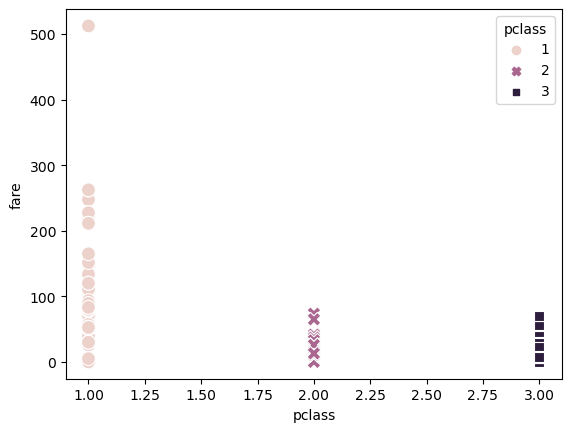

In [9]:
# pclass의 분포를 시각적으로 확인해보자
import seaborn as sns
import matplotlib.pyplot as plt

# scatter plot by Groups

sns.scatterplot(x = 'pclass',
               y = 'fare',
               hue = 'pclass',
               style = 'pclass',
               s = 100,
               data = df)


C:\Users\235ju\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pclass', ylabel='Density'>

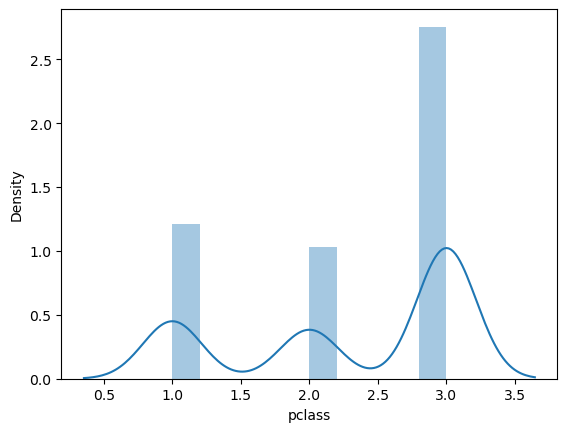

In [32]:
import matplotlib.pyplot as plt
sns.distplot(df['pclass'])
#plt.distplot('fare', kde = True,data = df)

C:\Users\235ju\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\235ju\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\235ju\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

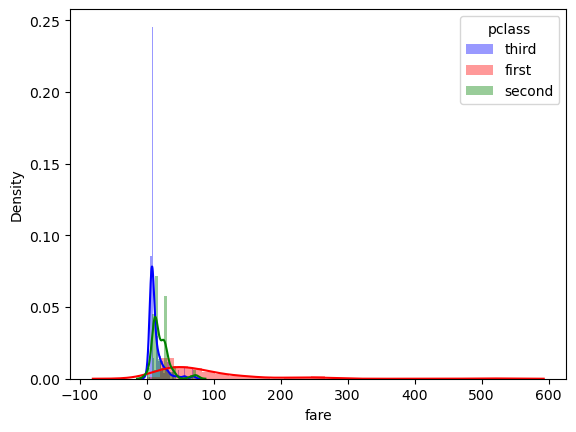

In [33]:
sns.distplot(df[df.pclass == class_list[0]]["fare"], 

             color="blue", label="third")



sns.distplot(df[df.pclass == class_list[1]]["fare"], 

             color="red", label="first")



sns.distplot(df[df.pclass == class_list[2]]["fare"], 

             color="green", label="second")



plt.legend(title="pclass")

plt.show()



In [35]:
# 위의 시각화를 통해 1번 클래스와 2번 클래스, 1번 클래스와 3번 클래스의 fare차이가 많이 나는 것을 확인할 수 있다.

In [21]:
third = df[df['pclass'] == class_list[0]]['fare']
first = df[df['pclass'] == class_list[1]]['fare']
second = df[df['pclass'] == class_list[2]]['fare']

In [23]:
first

1      71.2833
3      53.1000
6      51.8625
11     26.5500
23     35.5000
        ...   
871    52.5542
872     5.0000
879    83.1583
887    30.0000
889    30.0000
Name: fare, Length: 216, dtype: float64

In [24]:
#2. 독립변수의 정규성 검정 시행
# shapiro test를 통해 p-value가 유의수준 0.05보다 클 경우 표본이 정규분포를 따른다고 판단할 수 있다. 
import scipy.stats as stats
print(stats.shapiro(first))
print(stats.shapiro(second))
print(stats.shapiro(third))

ShapiroResult(statistic=0.7184011936187744, pvalue=7.556290242780962e-19)
ShapiroResult(statistic=0.7785054445266724, pvalue=2.1134194129582328e-15)
ShapiroResult(statistic=0.6183854341506958, pvalue=1.599492812175185e-31)


In [25]:
# 정규성 검정 결과 first, second, third 모든 변수들이 정규성을 만족하지 않고 있음
# 따라서 stats.kruskal을 이용하여 비모수 검정을 시행
stats.kruskal(first,second,third)

KruskalResult(statistic=438.0437034212556, pvalue=7.586096900646798e-96)

In [ ]:
# 비모수 검정 결과 p-value가 0.05보다 현저히 낮은 값이 나오므로 H0(세 그룹의 중앙값은 서로 같다)를 기각한다. 즉 모든 클래스에 대해 fare는 
# 통계적으로 유의한 차이가 있다는 것을 알 수 있다. 